# Tutorial TGAN

## Time-series Generative Adversarial Networks

This tutorial shows how to use TGAN to generate synthetic IoT data by training the model on CASAS aruba dataset

Experiment Settings (Import necessary packages and functions)

In [1]:

import numpy as np
import sys

#%% Functions
# 1. Models
from tganWithCheckpointing import tgan

# 2. Data Loading
from data_loading import CASAS_data_loading

# 3. Metrics
sys.path.append('metrics')
from discriminative_score_metrics import discriminative_score_metrics
from visualization_metrics import PCA_Analysis, tSNE_Analysis
from predictive_score_metrics import predictive_score_metrics

print('Finish importing necessary packages and functions')


C:\Users\Dhananjay Deswal\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dhananjay Deswal\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dhananjay Deswal\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Dhananjay Deswal\Anaconda3\lib\site-packages\tensorflow\python\f

Finish importing necessary packages and functions


Set main parameters and datasets

In [2]:
#%% Main Parameters
# Data
data_set = ['casas']
data_name = data_set[0]

# Experiments iterations
Iteration = 1
Sub_Iteration = 3

#%% Data Loading
seq_length = 24

if data_name == 'casas':
    dataX = CASAS_data_loading(seq_length)

print(data_name + ' dataset is ready.')


No. of sequences :  1719534
casas dataset is ready.


Set network parameters & Output initialization

In [3]:

#%% Newtork Parameters
parameters = dict()

parameters['checkpointFileName'] = "checkpoint.chk"  #for saving model weights and biases

parameters['hidden_dim'] = len(dataX[0][0,:]) * 4
parameters['num_layers'] = 3
parameters['iterations'] = 50001
parameters['batch_size'] = 128
parameters['module_name'] = 'gru'   # Other options: 'lstm' or 'lstmLN'
parameters['z_dim'] = len(dataX[0][0,:]) 

print('Parameters are ' + str(parameters))

#%% Experiments
# Output Initialization
Discriminative_Score = list()
Predictive_Score = list()

Parameters are {'checkpointFileName': 'checkpoint.chk', 'hidden_dim': 12, 'num_layers': 3, 'iterations': 50001, 'batch_size': 128, 'module_name': 'gru', 'z_dim': 3}


Run TGAN & Evaluate discriminative and predictive scores

In [4]:


def MinMaxScaler(dataX):
    
    min_val = np.min(np.min(dataX, axis = 0), axis = 0)
    dataXNorm = dataX - min_val
    
    max_val = np.max(np.max(dataXNorm, axis = 0), axis = 0)
    dataXNorm = dataXNorm / (max_val + 1e-7)
    
    return dataXNorm, min_val, max_val




print('Start iterations') 
    
# Each Iteration
for it in range(Iteration):

    
    # Synthetic Data Generation
    dataX_hat = tgan(dataX, parameters)
    
    dataXNorm, min_val_dataX, max_val_dataX = MinMaxScaler(dataX)
    dataX_hatNorm, min_val_dataX_hat, max_val_dataX_hat = MinMaxScaler(dataX_hat)
      
    print('Finish Synthetic Data Generation')

    #%% Performance Metrics
    
    # 1. Discriminative Score
    Acc = list()
    for tt in range(Sub_Iteration):
        Temp_Disc = discriminative_score_metrics (dataXNorm, dataX_hatNorm)
        Acc.append(Temp_Disc)
    
    Discriminative_Score.append(np.mean(Acc))
    
    # 2. Predictive Performance
    MAE_All = list()
    for tt in range(Sub_Iteration):
        MAE_All.append(predictive_score_metrics (dataXNorm, dataX_hatNorm))
        
    Predictive_Score.append(np.mean(MAE_All))    
    
print('Finish TGAN iterations')

Start iterations
Normalization_Flag :  1
Initializing from scratch
Start Embedding Network Training
step: 0, e_loss: 0.3398
step: 1000, e_loss: 0.0536
step: 2000, e_loss: 0.0267
step: 3000, e_loss: 0.0254
step: 4000, e_loss: 0.0219
step: 5000, e_loss: 0.0241
step: 6000, e_loss: 0.0112
step: 7000, e_loss: 0.0075
step: 8000, e_loss: 0.0065
step: 9000, e_loss: 0.0053
step: 10000, e_loss: 0.0049
step: 11000, e_loss: 0.0048
step: 12000, e_loss: 0.0045
step: 13000, e_loss: 0.005
step: 14000, e_loss: 0.0034
step: 15000, e_loss: 0.0048
step: 16000, e_loss: 0.0036
step: 17000, e_loss: 0.0037
step: 18000, e_loss: 0.0034
step: 19000, e_loss: 0.003
step: 20000, e_loss: 0.0048
step: 21000, e_loss: 0.0024
step: 22000, e_loss: 0.0029
step: 23000, e_loss: 0.0025
step: 24000, e_loss: 0.0022
step: 25000, e_loss: 0.0033
step: 26000, e_loss: 0.0039
step: 27000, e_loss: 0.0021
step: 28000, e_loss: 0.0021
step: 29000, e_loss: 0.0031
step: 30000, e_loss: 0.0033
step: 31000, e_loss: 0.0024
step: 32000, e_loss

Instructions for updating:
Please use tf.global_variables instead.
Finish TGAN iterations


Visualization (PCA Analysis)

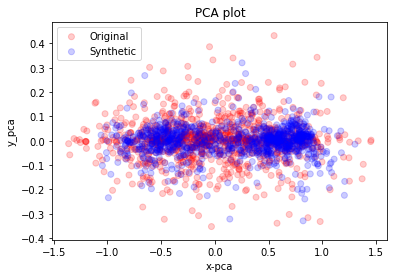

In [5]:
PCA_Analysis (dataXNorm, dataX_hatNorm)

Visualization (t-SNE Analysis)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.005s...
[t-SNE] Computed neighbors for 2000 samples in 0.166s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.058494
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.711617
[t-SNE] Error after 300 iterations: 1.129619


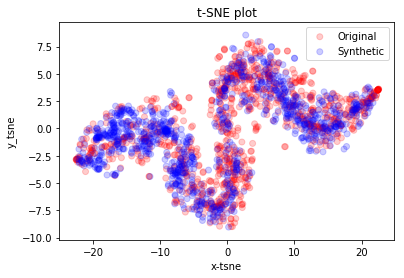

In [6]:
tSNE_Analysis (dataXNorm, dataX_hatNorm)

Print Discriminative and Predictive Scores

In [8]:
# Print Results
print('Discriminative Score - Mean: ' + str(np.round(np.mean(Discriminative_Score),4)) + ', Std: ' + str(np.round(np.std(Discriminative_Score),4)))
print('Predictive Score - Mean: ' + str(np.round(np.mean(Predictive_Score),4)) + ', Std: ' + str(np.round(np.std(Predictive_Score),4)))


Discriminative Score - Mean: 0.201, Std: 0.0
Predictive Score - Mean: 0.0083, Std: 0.0


In [7]:
dataX_hat

array([[[6.91702877e+06, 2.30106291e+01, 6.33957125e-05],
        [6.92355670e+06, 1.99195677e+01, 2.73477005e-02],
        [6.93163956e+06, 2.37816327e+01, 4.27268372e-03],
        ...,
        [6.91480314e+06, 2.49266878e+01, 2.50719171e-03],
        [6.92870132e+06, 1.65753053e+01, 9.63468437e-02],
        [6.92900211e+06, 1.81569436e+01, 4.72580788e-02]],

       [[1.48704202e+07, 1.80611506e+01, 1.41172068e-03],
        [1.49333248e+07, 7.52567254e+00, 3.74327729e+00],
        [1.48907891e+07, 1.29753600e+01, 1.03759628e+00],
        ...,
        [1.48731313e+07, 1.94254761e+01, 9.92656389e-02],
        [1.48777944e+07, 2.47573161e+01, 1.14803052e-02],
        [1.48723042e+07, 1.87542267e+01, 1.31255015e-01]],

       [[6.42981987e+06, 3.17439761e+01, 3.07050719e-06],
        [6.44683700e+06, 3.54774011e+01, 1.67980966e-05],
        [6.46860052e+06, 3.27633690e+01, 5.07924210e-05],
        ...,
        [6.47307728e+06, 2.10859730e+01, 1.27611182e-02],
        [6.46427500e+06, 2.57

In [ ]:
originalResult = dataX_hat

In [10]:

    
dataX_hat[:,:,1:] = np.round(dataX_hat[:,:,1:])

def show(dataX_hat, i):
    sample = []
    for j in range(dataX_hat.shape[1]):
        row = []

        time = dataX_hat[i,j,0]
        secFrac = time-int(time)
        time = int(time)
        day = time//86400
        time = time%86400
        hrs = time//3600
        time = time%3600
        m = time//60
        sec = time%60

        dateTime = str(day)+" "+str(hrs)+":"+str(m)+":"+str(sec+secFrac)

        row.append(dateTime)
        row.append(int(dataX_hat[i,j,1]))
        row.append(int(dataX_hat[i,j,2]))

        sample.append(row)

    return sample

In [11]:
sampleNo = 123
show(dataX_hat, sampleNo)

[['8 8:54:28.00472154817544', 9, 0],
 ['9 8:51:11.619623615290038', 6, 23],
 ['9 11:32:40.26727949490305', 6, 13],
 ['9 9:37:10.650215673726052', 11, 1],
 ['9 8:44:42.60091264988296', 26, 0],
 ['9 8:33:37.856162277865224', 14, 0],
 ['9 9:32:21.187439840636216', 8, 3],
 ['9 13:22:18.393829804612324', 36, 0],
 ['9 7:31:23.871323535218835', 6, 10],
 ['9 10:59:58.53386353247333', 29, 0],
 ['9 6:19:33.65163407602813', 21, 0],
 ['9 8:16:36.310304415063', 17, 0],
 ['9 8:27:16.69713040185161', 28, 0],
 ['9 7:30:0.4595941000152379', 17, 0],
 ['9 8:21:13.169270537095144', 19, 0],
 ['9 7:45:14.802261500270106', 25, 0],
 ['9 8:34:2.214086663094349', 12, 0],
 ['9 10:29:36.929320704424754', 32, 0],
 ['9 7:59:27.612846659962088', 11, 1],
 ['9 8:56:38.610596902202815', 25, 0],
 ['9 7:17:21.894350093323737', 20, 0],
 ['9 11:9:2.975958292838186', 2, 39],
 ['9 3:46:51.31924550735857', 1, 0],
 ['9 5:58:16.559993928065524', 1, 0]]

In [12]:
sampleNo = 12345
show(dataX_hat, sampleNo)

[['173 18:28:15.739707322791219', 14, 0],
 ['173 19:57:46.945265932008624', 17, 0],
 ['173 23:57:4.525532593950629', 19, 0],
 ['173 23:12:50.0782379694283', 18, 0],
 ['173 22:50:27.560079995542765', 13, 1],
 ['174 0:31:40.04727555438876', 22, 0],
 ['173 22:27:0.4650992341339588', 12, 1],
 ['174 0:43:9.999645346775651', 18, 0],
 ['173 23:19:26.6025884244591', 13, 1],
 ['174 0:36:11.949687294661999', 20, 0],
 ['173 22:46:4.721081977710128', 12, 1],
 ['174 0:43:8.866718631237745', 18, 0],
 ['173 23:50:51.79264316521585', 20, 0],
 ['173 22:38:23.619908733293414', 13, 1],
 ['173 23:41:43.45611282065511', 13, 1],
 ['174 0:50:1.252043105661869', 16, 0],
 ['174 0:26:13.76438146457076', 21, 0],
 ['173 23:10:39.791665675118566', 15, 0],
 ['173 22:55:42.51370692998171', 13, 1],
 ['174 0:20:7.8290523290634155', 14, 1],
 ['174 0:39:17.749668652191758', 20, 0],
 ['173 23:33:26.101284677162766', 19, 0],
 ['173 22:5:16.46644959039986', 12, 1],
 ['174 0:14:12.090063633397222', 15, 1]]

In [13]:
allSamples = [dataX_hat[i,j,:] for i in range(dataX_hat.shape[0]) for j in range(dataX_hat.shape[1])]

In [14]:
allSamples = np.array(allSamples)

In [15]:
allSamples.shape

(41268816, 3)

In [16]:
#For sorting allSamples on the basis of time
sortedIndex = allSamples[:,0].argsort()
allSamples = allSamples[sortedIndex]

In [17]:
allSamples

array([[2.97928104e+04, 4.00000000e+01, 0.00000000e+00],
       [3.23374324e+04, 3.90000000e+01, 0.00000000e+00],
       [3.26058940e+04, 4.00000000e+01, 0.00000000e+00],
       ...,
       [1.57321797e+07, 1.00000000e+00, 2.00000000e+00],
       [1.57329841e+07, 1.00000000e+00, 3.00000000e+00],
       [1.57380778e+07, 1.00000000e+00, 3.00000000e+00]])

In [27]:
#For saving the generated data as csv file
np.savetxt("output.csv", allSamples, delimiter=",")